In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',delimiter = '\t', quoting = 3)

In [3]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer as stemmer
corpus = []
ps = stemmer()
stpwords = stopwords.words('english')
stpwords.remove('not')
for i in range(1000):
    reviews = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    reviews = reviews.lower()
    reviews = reviews.split()
    reviews = [ps.lemmatize(review) for review in reviews if review not in set()]
    reviews = ' '.join(reviews)
    corpus.append(reviews)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\13651\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\13651\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [5]:
print(corpus)

['wow loved this place', 'crust is not good', 'not tasty and the texture wa just nasty', 'stopped by during the late may bank holiday off rick steve recommendation and loved it', 'the selection on the menu wa great and so were the price', 'now i am getting angry and i want my damn pho', 'honeslty it didn t taste that fresh', 'the potato were like rubber and you could tell they had been made up ahead of time being kept under a warmer', 'the fry were great too', 'a great touch', 'service wa very prompt', 'would not go back', 'the cashier had no care what so ever on what i had to say it still ended up being wayyy overpriced', 'i tried the cape cod ravoli chicken with cranberry mmmm', 'i wa disgusted because i wa pretty sure that wa human hair', 'i wa shocked because no sign indicate cash only', 'highly recommended', 'waitress wa a little slow in service', 'this place is not worth your time let alone vega', 'did not like at all', 'the burrittos blah', 'the food amazing', 'service is also c

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
x = tfid.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [8]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
clf = GaussianNB()
clf2 =  MultinomialNB()
clf3 = BernoulliNB()
clf.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)

BernoulliNB()

In [9]:
y_pred = clf.predict(x_test)
y_pred_2 = clf2.predict(x_test)
y_pred_3 = clf3.predict(x_test)

[[57 42]
 [16 85]]


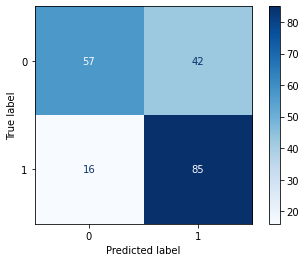

In [10]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(clf,x_test,y_test,cmap='Blues')

In [11]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_2))
plot_confusion_matrix(clf2,x_test,y_test,cmap='Blues')

[[76 23]
 [12 89]]


In [12]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred_3))
plot_confusion_matrix(clf3,x_test,y_test,cmap='Blues')

[[68 31]
 [15 86]]


In [13]:
y_pred_f = np.array((y_pred + y_pred_2 + y_pred_3)/3 > 0.6, dtype = int)

In [14]:
print(confusion_matrix(y_test, y_pred_f))

[[72 27]
 [14 87]]


In [15]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [16]:
svm_pred = svm.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, svm_pred))
plot_confusion_matrix(svm,x_test,y_test,cmap='Blues')

[[89 10]
 [28 73]]


In [36]:
(89+73)/(89+73+38)

0.81

In [37]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
rfc_predict = forest.predict(x_test)

[[83 16]
 [32 69]]


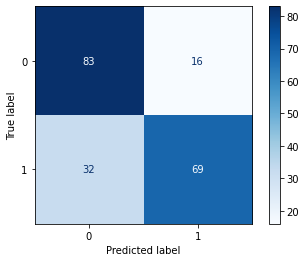

In [39]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, rfc_predict))
plot_confusion_matrix(forest,x_test,y_test,cmap='Blues')

In [40]:
(80+73)/(82+28+19+73)

0.7574257425742574

In [41]:
from sklearn.tree import DecisionTreeClassifier
dsc = DecisionTreeClassifier()
dsc.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
dsc_predict = dsc.predict(x_test)

[[76 23]
 [31 70]]


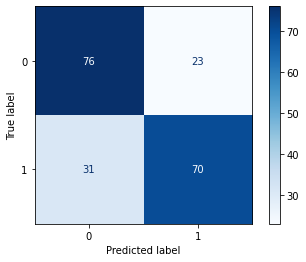

In [43]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, dsc_predict))
plot_confusion_matrix(dsc,x_test,y_test,cmap='Blues')

In [44]:
from sklearn.linear_model import LogisticRegressionCV
lgs = LogisticRegressionCV()
lgs.fit(x_train, y_train)

LogisticRegressionCV()

In [54]:
lgs_predict = lgs.predict(x_test)

[[82 17]
 [20 81]]


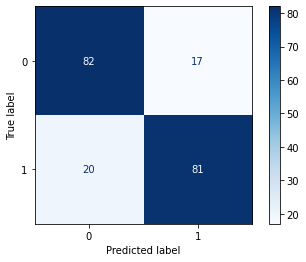

In [46]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, lgs_predict))
plot_confusion_matrix(lgs,x_test,y_test,cmap='Blues')

In [47]:
from sklearn.model_selection import cross_val_score
for i in range(10):
    clf = DecisionTreeClassifier(random_state=0)    
    a = cross_val_score(clf, x_train, y_train, cv=10)
    clf2 = DecisionTreeClassifier(random_state=0)    
    b = cross_val_score(clf2, x_train, y_train, cv=10)
    if not np.array_equal(a,b):
        print('diff')
        print(a)
        print(b)
        break

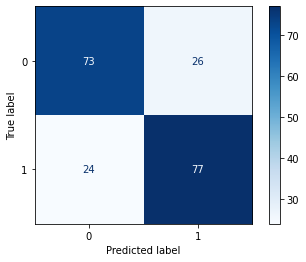

In [52]:
clf2.fit(x_train, y_train)
plot_confusion_matrix(clf2,x_test,y_test,cmap='Blues')